In [29]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import datasets, layers, models, Sequential
from keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, ImageDataGenerator
from keras.layers import Dense, Activation, Dropout, Input, Conv2D, MaxPooling2D, Flatten, ReLU, AveragePooling2D, add

# CIFAR-10 Dataset

In [30]:
(cifar_xTrain, cifar_yTrain), (cifar_xTest, cifar_yTest) = datasets.cifar10.load_data()

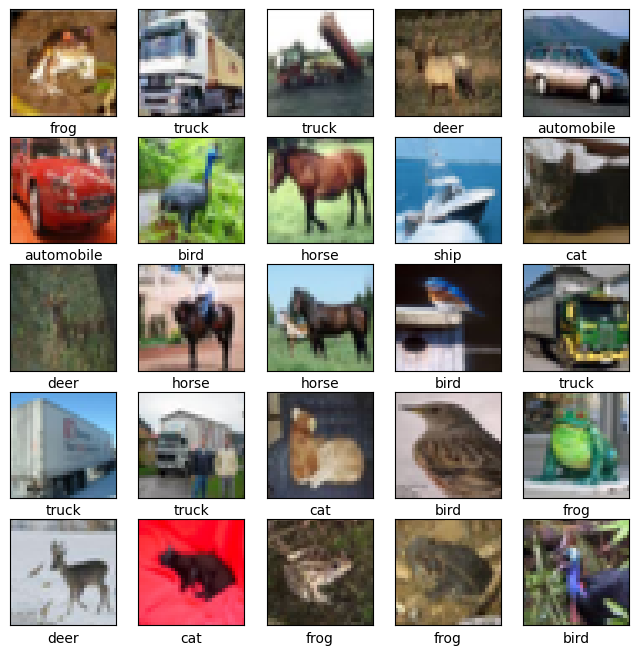

In [31]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cifar_xTrain[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[cifar_yTrain[i][0]])
plt.show()

In [32]:
cifar_xTrain = cifar_xTrain.astype('float32') / 255.0
cifar_xTest = cifar_xTest.astype('float32') / 255.0

In [33]:
cifar_yTrain = utils.to_categorical(cifar_yTrain)
cifar_yTest = utils.to_categorical(cifar_yTest)

In [34]:
print('X Train Shape: ', cifar_xTrain.shape)
print('X Test Shape:  ', cifar_xTest.shape)
print('\nY Train Shape: ', cifar_yTrain.shape)
print('Y Test Shape:  ', cifar_yTest.shape)

X Train Shape:  (50000, 32, 32, 3)
X Test Shape:   (10000, 32, 32, 3)

Y Train Shape:  (50000, 10)
Y Test Shape:   (10000, 10)


## VGG-16 Architecutre on CIFAR-10 Dataset

In [35]:
inputShape = (32,32,3)
inputLayer = Input(shape=inputShape, name='img_input')

In [36]:
# Block 1
x = Conv2D(64, (3,3), padding='same', activation='relu', name='block1_conv1')(inputLayer)
x = Conv2D(64, (3,3), padding='same', activation='relu', name='block1_conv2')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3,3), padding='same', activation='relu', name='block2_conv1')(x)
x = Conv2D(128, (3,3), padding='same', activation='relu', name='block2_conv2')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3,3), padding='same', activation='relu', name='block3_conv1')(x)
x = Conv2D(256, (3,3), padding='same', activation='relu', name='block3_conv2')(x)
x = Conv2D(256, (3,3), padding='same', activation='relu', name='block3_conv3')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block3_pool')(x)

# Block 4
x = Conv2D(512, (3,3), padding='same', activation='relu', name='block4_conv1')(x)
x = Conv2D(512, (3,3), padding='same', activation='relu', name='block4_conv2')(x)
x = Conv2D(512, (3,3), padding='same', activation='relu', name='block4_conv3')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3,3), padding='same', activation='relu', name='block5_conv1')(x)
x = Conv2D(512, (3,3), padding='same', activation='relu', name='block5_conv2')(x)
x = Conv2D(512, (3,3), padding='same', activation='relu', name='block5_conv3')(x)
x = MaxPooling2D((2,2), strides=(2,2), name='block5_pool')(x)

x = Flatten()(x)
# Fully Connected 1
x = Dense(4096, activation='relu')(x)

# Fully Connected 2
x = Dense(4096, activation='relu')(x)

# Output Layer (SoftMax)
outputLayer = Dense(10, activation='softmax')(x)

vgg_cifar = Model(inputs=inputLayer, outputs=outputLayer)

- Compile the model

In [37]:
vgg_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg_cifar.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img_input (InputLayer)      [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

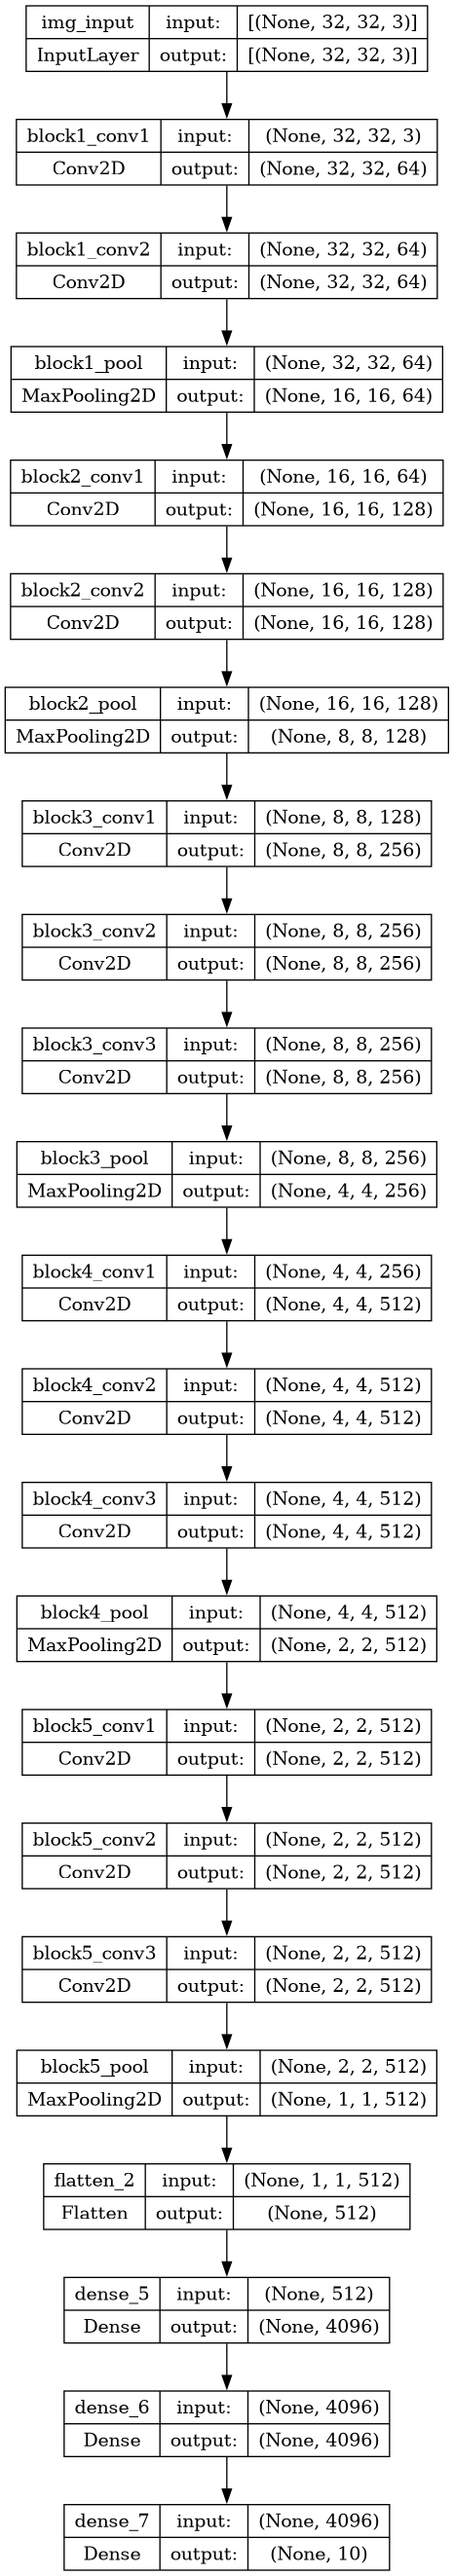

In [38]:
plot_model(vgg_cifar, show_shapes=True, to_file='vgg_model_cifar10.png')

- Train Model

In [39]:
vgg_cifar_history = vgg_cifar.fit(cifar_xTrain, cifar_yTrain, validation_data=(cifar_xTest, cifar_yTest), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 53s 31ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 48s 31ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 49s 31ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 2.3028 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3026 -

- Make Predictions

In [40]:
vgg_cifar_perdict = vgg_cifar.predict(cifar_xTest)

313/313 [==============================] - 2s 7ms/step


In [41]:
vgg_cifar_perdict = [np.argmax(arr) for arr in vgg_cifar_perdict]
cifar_ytest = [np.argmax(arr) for arr in cifar_yTest]

In [42]:
print(np.array(vgg_cifar_perdict))
print(np.array(cifar_ytest))

[9 9 9 ... 9 9 9]
[3 8 8 ... 5 1 7]


- Evaluate Model

In [43]:
vgg_cifar.evaluate(cifar_xTest,cifar_yTest)

313/313 [==============================] - 3s 8ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026182651519775, 0.10000000149011612]

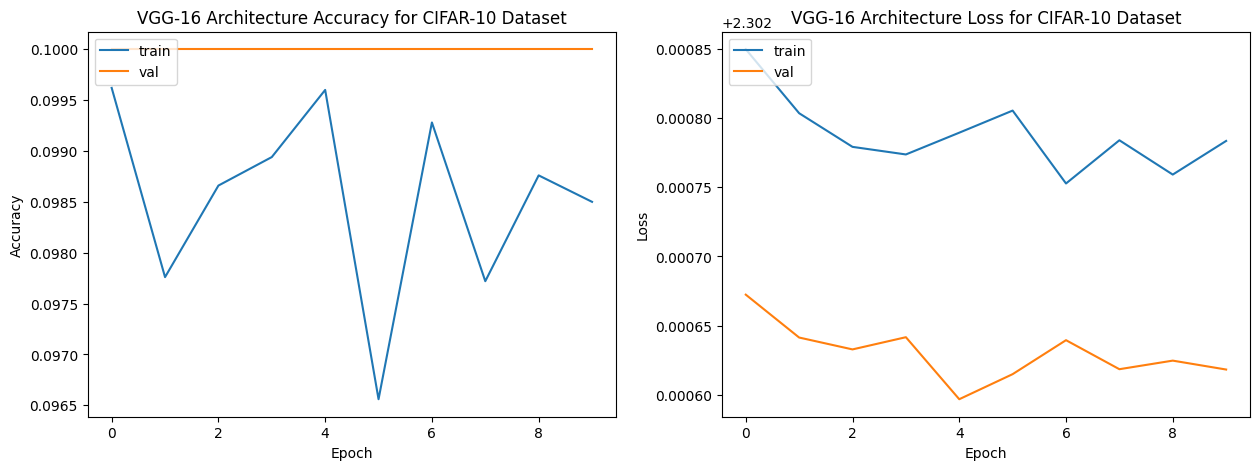

In [44]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(vgg_cifar_history.history['accuracy'])
plt.plot(vgg_cifar_history.history['val_accuracy'])
plt.title('VGG-16 Architecture Accuracy for CIFAR-10 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(vgg_cifar_history.history['loss'])
plt.plot(vgg_cifar_history.history['val_loss'])
plt.title('VGG-16 Architecture Loss for CIFAR-10 Dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [45]:
print('Accuracy Score =',round(np.max(vgg_cifar_history.history['val_accuracy']) * 100, 2) , '%')

Accuracy Score = 10.0 %


## Pretrained VGG-16 on CIFAR-10 Dataset

In [46]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

pretrainedvggCifarModel = Model(inputs=base_model.input, outputs=output)

In [47]:
pretrainedvggCifarModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
pretrainedvggCifarModel.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

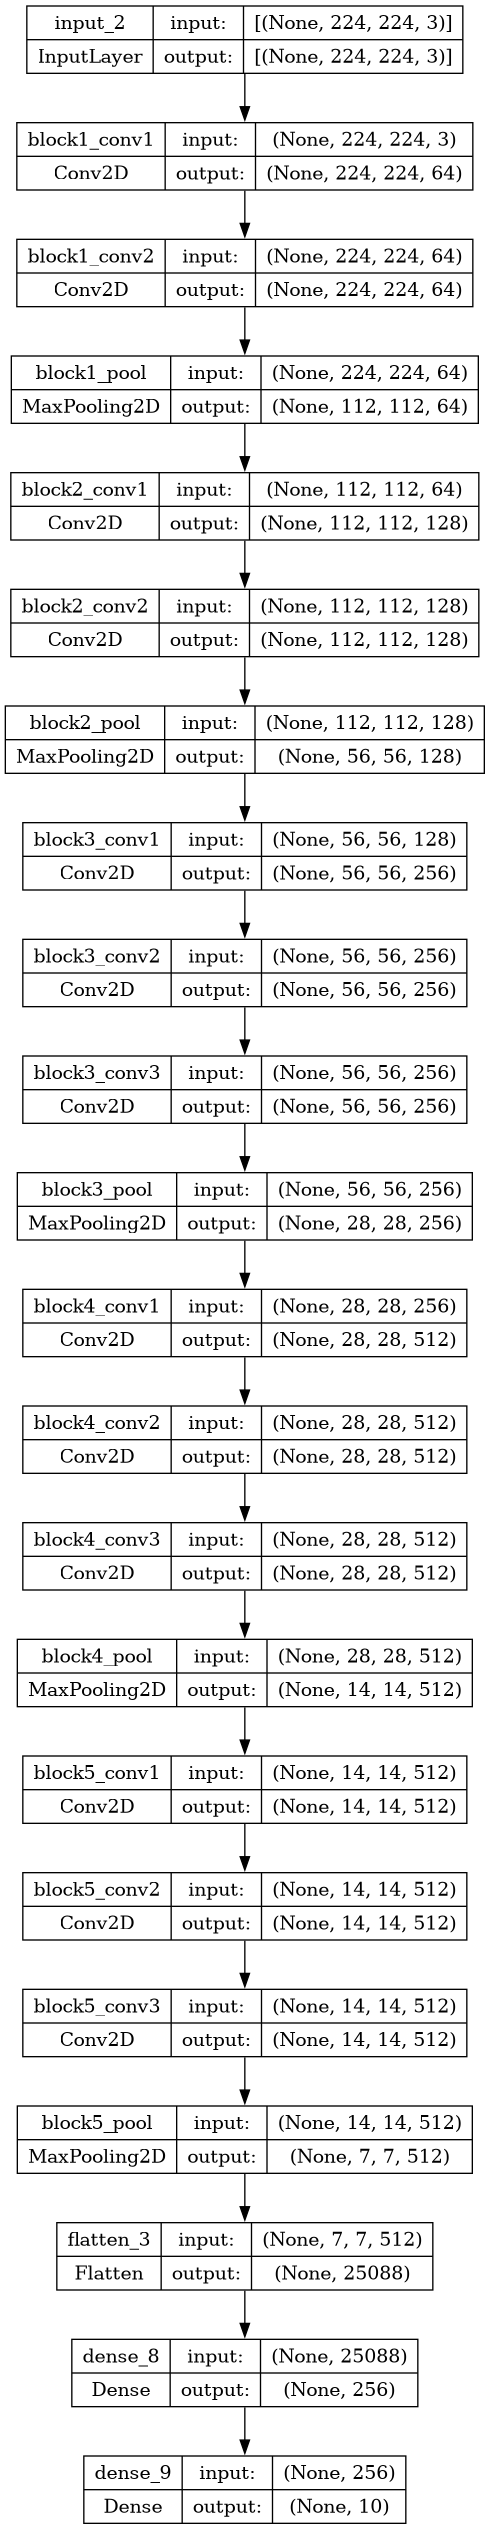

In [48]:
plot_model(pretrainedvggCifarModel, show_shapes=True, to_file='pretrained_vgg_model_cifar10.png')

In [49]:
x_train_resized = tf.image.resize(cifar_xTrain[:1000], (224, 224)).numpy()
x_test_resized = tf.image.resize(cifar_xTest[:1000], (224, 224)).numpy()

In [50]:
pretrainedVggCifarHistory = pretrainedvggCifarModel.fit(x_train_resized, cifar_yTrain[:1000], epochs=10, validation_data=(x_test_resized, cifar_yTest[:1000]))

Epoch 1/10
32/32 [==============================] - 11s 312ms/step - loss: 2.9977 - accuracy: 0.1970 - val_loss: 1.8834 - val_accuracy: 0.3120
Epoch 2/10
32/32 [==============================] - 8s 264ms/step - loss: 1.5179 - accuracy: 0.4940 - val_loss: 1.6289 - val_accuracy: 0.3600
Epoch 3/10
32/32 [==============================] - 8s 266ms/step - loss: 1.1594 - accuracy: 0.6290 - val_loss: 1.4588 - val_accuracy: 0.4900
Epoch 4/10
32/32 [==============================] - 8s 266ms/step - loss: 0.9256 - accuracy: 0.7300 - val_loss: 1.5635 - val_accuracy: 0.4750
Epoch 5/10
32/32 [==============================] - 8s 269ms/step - loss: 0.7667 - accuracy: 0.7750 - val_loss: 1.3741 - val_accuracy: 0.5380
Epoch 6/10
32/32 [==============================] - 8s 270ms/step - loss: 0.7003 - accuracy: 0.7940 - val_loss: 1.5010 - val_accuracy: 0.4890
Epoch 7/10
32/32 [==============================] - 9s 270ms/step - loss: 0.5557 - accuracy: 0.8500 - val_loss: 1.4673 - val_accuracy: 0.5010
Epoch

In [56]:
pretrainedvggCifarModel.evaluate(x_test_resized,cifar_yTest[:1000])

32/32 [==============================] - 4s 120ms/step - loss: 1.3055 - accuracy: 0.5450


[1.3054659366607666, 0.5450000166893005]

In [51]:
pretrainedVggCifarPerdict = pretrainedvggCifarModel.predict(x_test_resized)

pretrainedVggCifarPerdict = [np.argmax(arr) for arr in pretrainedVggCifarPerdict]
print(np.array(pretrainedVggCifarPerdict))

32/32 [==============================] - 4s 136ms/step
[7 8 3 1 6 6 1 2 4 1 4 9 7 7 9 6 5 5 8 6 7 0 2 9 4 2 2 2 9 2 2 2 4 5 9 5 7
 1 9 5 2 6 5 6 8 9 3 7 7 2 9 8 2 2 8 8 7 2 5 3 7 5 6 9 6 6 1 2 3 7 2 3 8 8
 1 2 9 3 5 8 8 9 1 7 2 7 2 2 8 9 8 2 8 5 7 6 6 2 0 2 4 2 5 3 1 1 2 6 8 5 4
 0 2 2 1 2 2 7 2 7 8 0 1 2 8 8 8 3 5 2 4 1 9 9 3 2 9 7 5 8 6 5 6 3 5 4 5 5
 5 2 0 1 5 1 2 5 2 3 2 8 2 1 5 2 0 7 8 4 6 8 9 1 3 8 1 9 0 7 3 2 3 5 2 2 7
 8 4 3 7 8 6 3 0 1 6 2 8 2 2 2 7 8 0 7 2 3 0 4 7 9 5 8 5 5 1 2 2 1 0 7 7 3
 9 5 5 9 2 2 3 6 5 1 5 1 8 0 4 9 7 2 1 9 2 9 0 5 0 8 7 1 3 5 9 8 2 8 6 8 8
 1 5 1 3 2 8 8 2 4 7 2 2 7 7 5 8 2 1 5 7 7 9 0 6 1 8 9 1 8 7 9 1 2 6 7 3 4
 6 0 0 6 6 6 5 2 5 8 9 2 1 2 8 6 8 0 2 7 4 7 5 5 3 2 2 5 7 7 7 7 2 6 1 9 3
 6 6 1 5 8 2 7 7 6 2 1 8 5 4 6 8 1 1 3 8 2 2 7 2 2 1 0 9 5 8 7 1 0 2 2 8 1
 2 7 9 4 2 7 2 5 2 6 6 5 0 1 5 0 7 2 2 5 1 2 6 2 5 6 3 2 1 6 9 1 7 2 8 5 0
 1 8 2 7 0 5 6 1 9 7 7 2 2 2 5 8 8 2 9 6 5 6 6 2 5 3 7 7 7 5 2 5 1 1 2 9 3
 2 2 2 0 5 0 1 9 7 2 9 2 4 5 3 3 7 6 1 7 5 6 

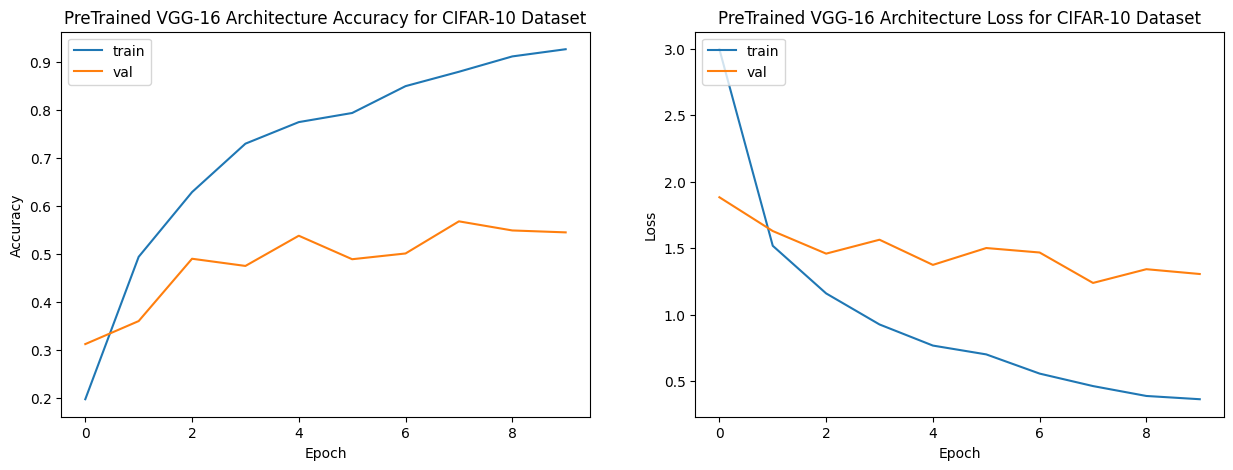

In [52]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(pretrainedVggCifarHistory.history['accuracy'])
plt.plot(pretrainedVggCifarHistory.history['val_accuracy'])
plt.title('PreTrained VGG-16 Architecture Accuracy for CIFAR-10 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(pretrainedVggCifarHistory.history['loss'])
plt.plot(pretrainedVggCifarHistory.history['val_loss'])
plt.title('PreTrained VGG-16 Architecture Loss for CIFAR-10 Dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [53]:
print('Accuracy Score =',round(np.max(pretrainedVggCifarHistory.history['val_accuracy']) * 100, 2) , '%')

Accuracy Score = 56.8 %
